In [34]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# 1.Load the data set into the notebook
I did this with the help of https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [11]:
columns = ["Existing checking account", "Duration in months", "Credit history", "Purpose", "Credit amount", "Savings account/bonds", "Present employement since", "Inst rate in perc of disp inc", 
        "Personal status and sex", "Debtors","Present residence since","Property","Age in years","Other installment plans", "Housing", "Number of existing credits at this bank", "Job", 
        "No of ppl providing maintanance for", "Telephone","Foreign", "output"]
df = pd.read_csv("german.data", names=columns, header=None, sep=" ")
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Existing checking account                1000 non-null   object
 1   Duration in months                       1000 non-null   int64 
 2   Credit history                           1000 non-null   object
 3   Purpose                                  1000 non-null   object
 4   Credit amount                            1000 non-null   int64 
 5   Savings account/bonds                    1000 non-null   object
 6   Present employement since                1000 non-null   object
 7   Inst rate in perc of disp inc            1000 non-null   int64 
 8   Personal status and sex                  1000 non-null   object
 9   Debtors                                  1000 non-null   object
 10  Present residence since                  1000 non-null   int6

,Existing checking account,Duration in months,Credit history,Purpose,Credit amount,Savings account/bonds,Present employement since,Inst rate in perc of disp inc,Personal status and sex,Debtors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,No of ppl providing maintanance for,Telephone,Foreign,output
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


From this we can see that there's 8 quantitative columns and 13 qualitative ones (But I already knew that from reading the link I mentioned above)
The next step is doing descriptive statistics and correlation matrix:

In [14]:
df.describe() #These are the 8 numerical columns

,Duration in months,Credit amount,Inst rate in perc of disp inc,Present residence since,Age in years,Number of existing credits at this bank,No of ppl providing maintanance for,output
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


C:\Users\vojislav\AppData\Local\Temp\ipykernel_6888\2268837940.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelacija = df.corr()


[Text(0.5, 0, 'DIM'),
 Text(1.5, 0, 'Credit amount'),
 Text(2.5, 0, 'IRIPODI'),
 Text(3.5, 0, 'PRS'),
 Text(4.5, 0, 'Age'),
 Text(5.5, 0, 'NOECATB'),
 Text(6.5, 0, 'NOPPMF'),
 Text(7.5, 0, 'output')]

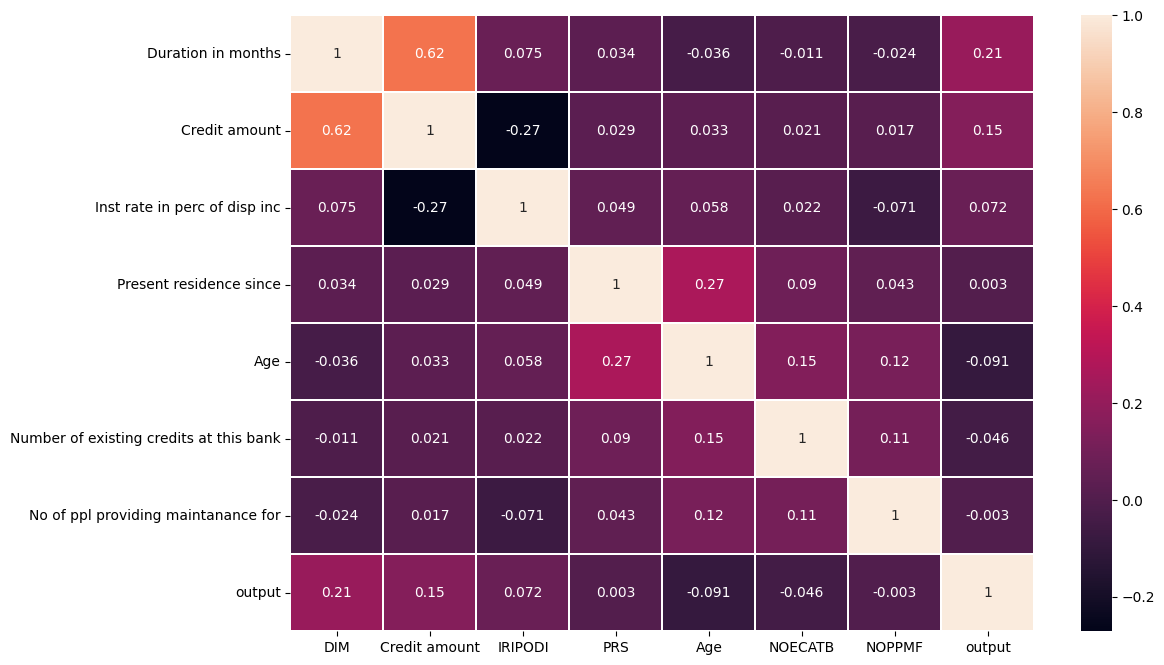

In [27]:
columns = ["Duration in months", "Credit amount",	"Inst rate in perc of disp inc", "Present residence since",	"Age",	"Number of existing credits at this bank", 
"No of ppl providing maintanance for",	"output"]
columns2 = ["DIM", "Credit amount", "IRIPODI", "PRS", "Age", "NOECATB", "NOPPMF", "output"] #Made this so it doesn't look that ugly or that you don't have to flip your head while looking at the matrix
korelacija = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(data = korelacija, annot=True, linewidth=0.3)
ax.set_yticklabels(labels=columns, rotation=0)
ax.set_xticklabels(labels = columns2, rotation = 0)


From this we can see that credit amount is highly correlated with duration in months, which, after a bit of googling, I found out makes sense. 
Credit amount also has a solid inverse correlation with the installment rate. Lastly, Age in years is correlated with resident since, which is self explanatory.
Now we must do the same for the categorical columns.

In [36]:
df.describe(include=object) #Used this to copy the names
columns3 = ["Existing checking account",	"Credit history", 	"Purpose",	"Savings account/bonds",
            "Present employement since",	"Personal status and sex",	"Debtors",	"Property",	"Other installment plans",	"Housing", "Job",	"Telephone", "Foreign"]
columns4 = ["ECA", "CH", "Purpose", "SA/B","PES","PSAS","Debtors", "Property","OIP", "Housing", "Job", "Tel","Foreign"]

# I tried with onehotencoder but it looked really ugly when using a heatmap (it had like 60 columns)

le = LabelEncoder()

df["Existing checking account cat"] = le.fit_transform(df["Existing checking account"])
df["Credit history cat"] = le.fit_transform(df["Credit history"])
df["Purpose cat"] = le.fit_transform(df["Purpose"])
df["Savings account/bonds cat"] = le.fit_transform(df["Savings account/bonds"])
df["Present employement since cat"] = le.fit_transform(df["Present employement since"])
df["Personal status and sex cat"] = le.fit_transform(df["Personal status and sex"])
df["Debtors cat"] = le.fit_transform(df["Debtors"])
df["Property cat"] = le.fit_transform(df["Property"])
df["Other installment plans cat"] = le.fit_transform(df["Other installment plans"])
df["Housing cat"] = le.fit_transform(df["Housing"])
df["Job cat"] = le.fit_transform(df["Job"])
df["Telephone cat"] = le.fit_transform(df["Telephone"])
df["Foreign cat"] = le.fit_transform(df["Foreign"])

df = df.drop(columns3, axis = 1)



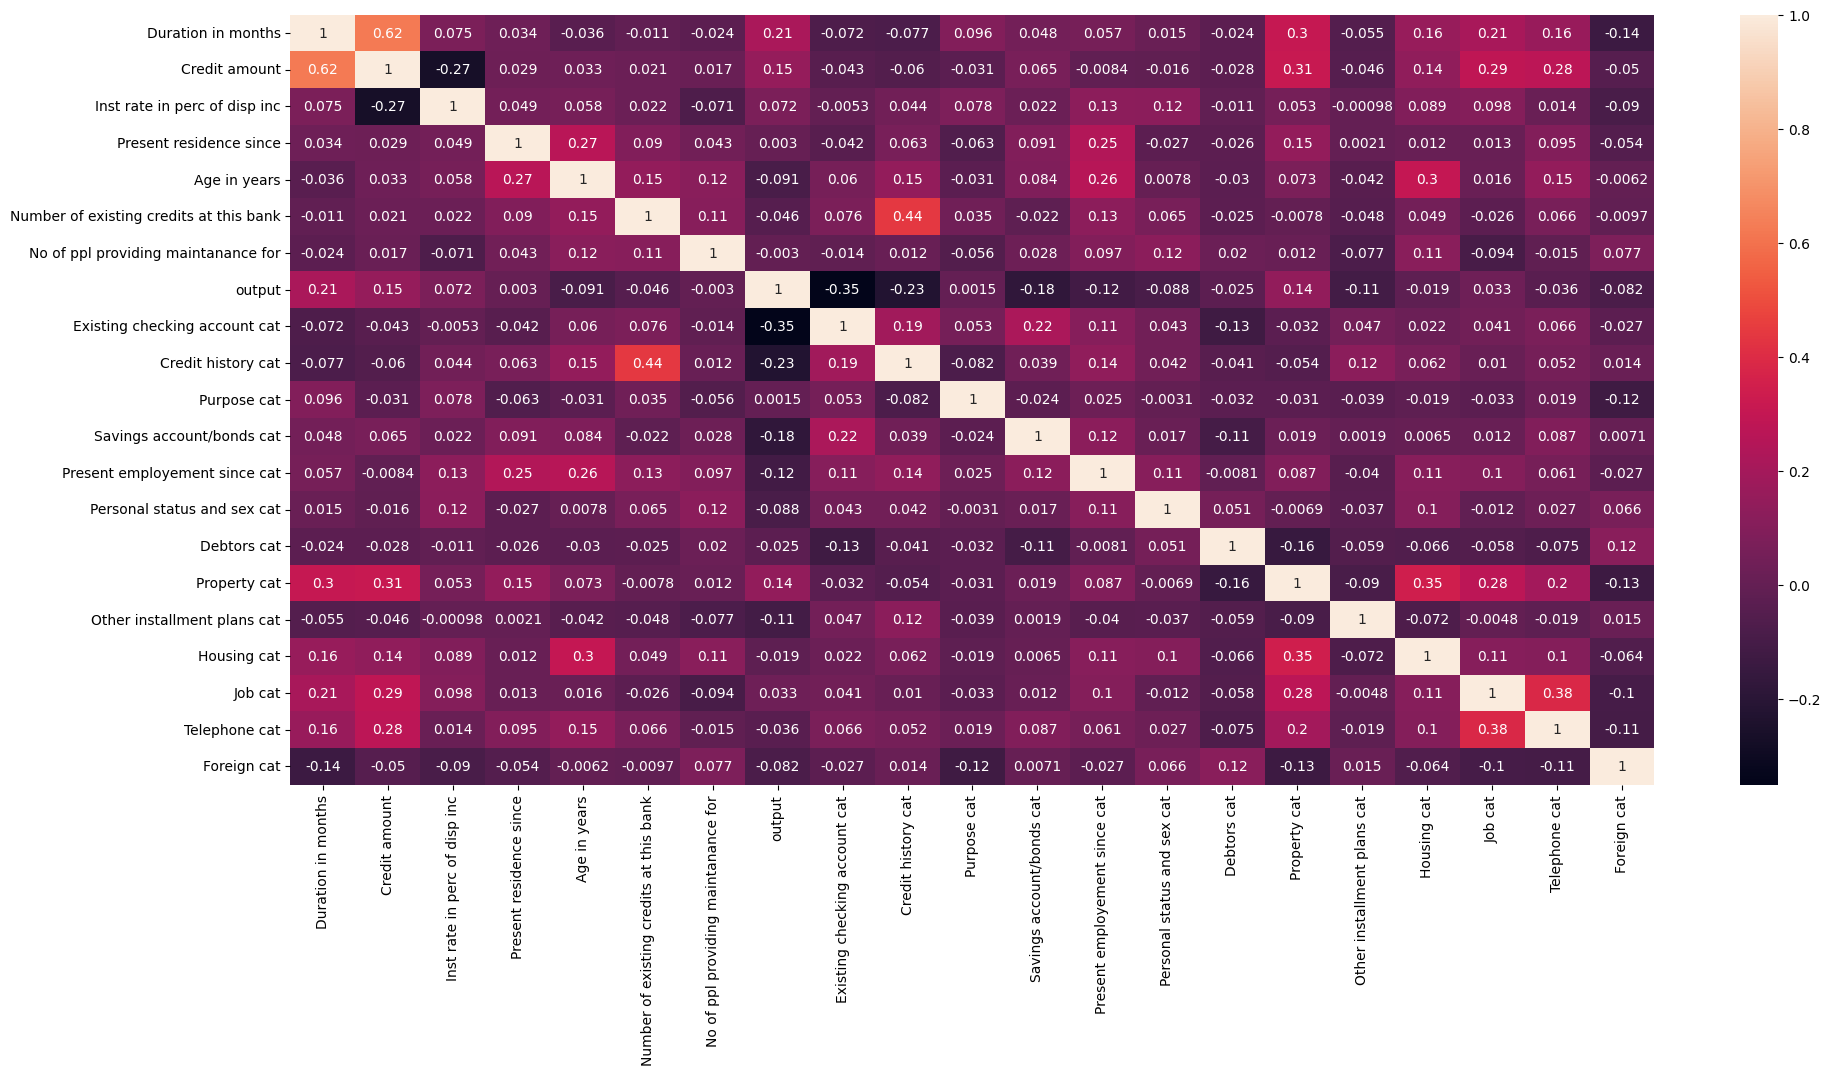

In [37]:
korelacija = df.corr()

fig, ax = plt.subplots(figsize=(22,10))
ax = sns.heatmap(korelacija, annot=True)

From this we can notice additional information. Some things that stand out are:
 - Credit history is directly linked with the number of existing credits
 - Having a job is linked with having a phone
 - Housing status is linked with property xD
 - Housing is linked with Age
 
But the most important important thing we should be looking at is which of the columns impact the output most, since those will be the most important for the classification process.
It seems the most impactful ones are:
 - Existing checking account category
 - Property
 - Credit history
 - Duration 
 - Amount
 - Saving accounts/bonds

In [71]:
#Splitting into test and validation set
from sklearn.model_selection import train_test_split

x = df.drop("output",axis = 1)
y = df["output"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25)



# 2. Fit a Logistic Regression model.

In [77]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred=logreg.predict(xtest)


C:\Users\vojislav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Confusion matrix

0.7


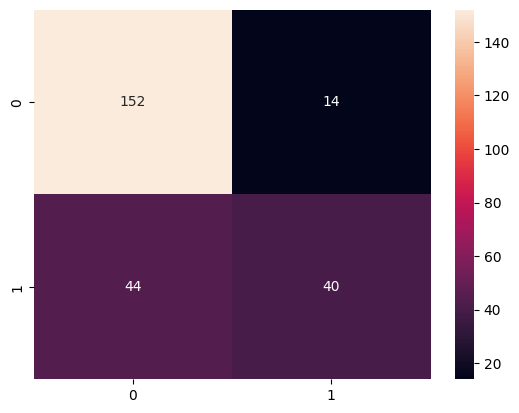

In [78]:
from sklearn.metrics import confusion_matrix
confusionm = confusion_matrix(ytest, ypred)
sns.heatmap(confusionm, annot = True, fmt="d")
positive = df["output"]==1
print(df[positive].shape[0]/df.shape[0])

We can see that the ratio isn't that good, since sensitivity = TP/(TP+FN) = 0.768, but it's still better than the original chance of picking a correct choice of 0.7
Let's see how the other stuff compares:

0.768
              precision    recall  f1-score   support

           1       0.78      0.92      0.84       166
           2       0.74      0.48      0.58        84

    accuracy                           0.77       250
   macro avg       0.76      0.70      0.71       250
weighted avg       0.76      0.77      0.75       250



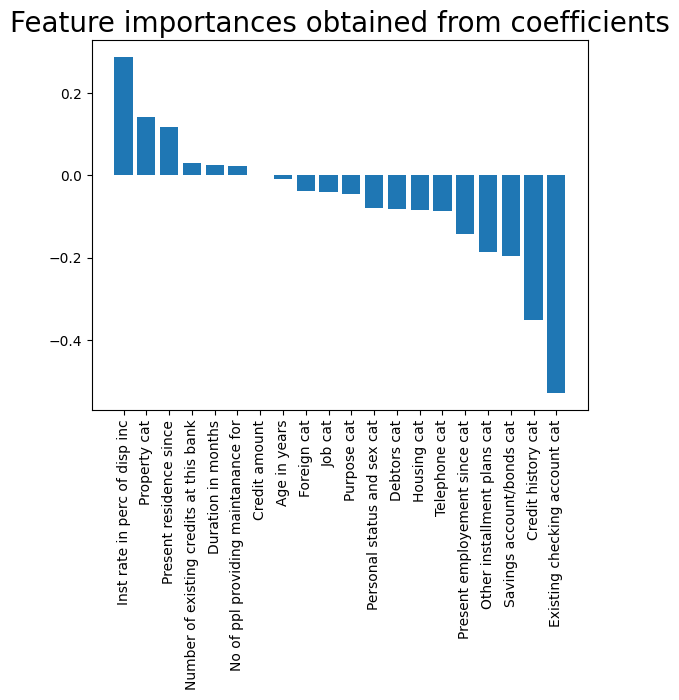

In [89]:
from sklearn.metrics import classification_report
print(logreg.score(xtest, ytest))
print(classification_report(ytest, ypred))
importances = pd.DataFrame(data={
    'Attribute': xtrain.columns,
    'Importance': logreg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

From this we can see that the most impactful features are:
- Existing checking account
- Credit history category
- Installment rate 
- Savings
- Other installment plans

# 3. Fit a Linear Discriminant Analysis model.

0.772
              precision    recall  f1-score   support

           1       0.78      0.91      0.84       166
           2       0.74      0.50      0.60        84

    accuracy                           0.77       250
   macro avg       0.76      0.70      0.72       250
weighted avg       0.77      0.77      0.76       250



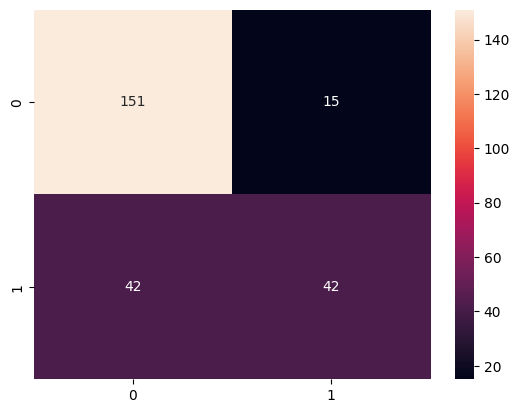

In [97]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lindiscmodel = LinearDiscriminantAnalysis()
lindiscmodel.fit(xtrain, ytrain)
ypred2=lindiscmodel.predict(xtest)

confusionm2 = confusion_matrix(ytest, ypred2)
sns.heatmap(confusionm2, annot = True, fmt="d")
print(lindiscmodel.score(xtest, ytest))
print(classification_report(ytest, ypred2))


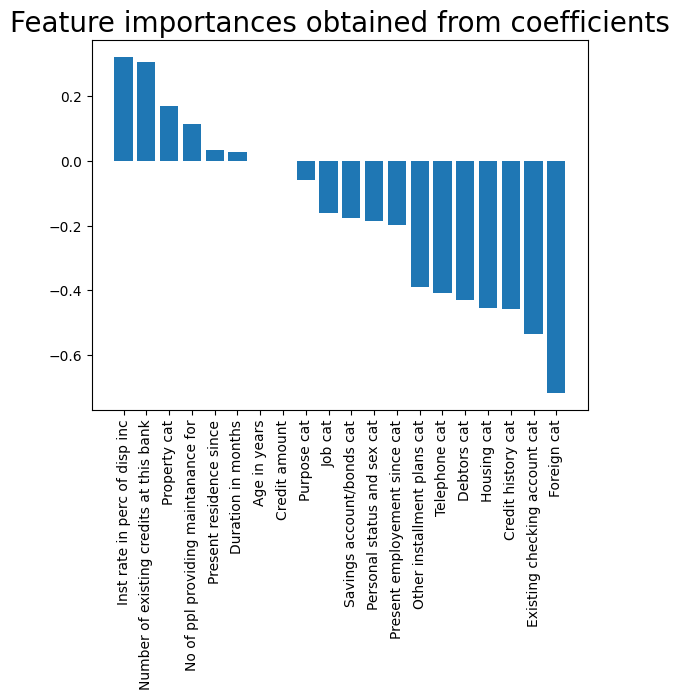

In [94]:
importances = pd.DataFrame(data={
    'Attribute': xtrain.columns,
    'Importance': lindiscmodel.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


I'll just write a resume here:
 - The results do not differ that much, from 0.768 to 0.772, so this isn't that much better than the logistic regression model
 - In this model all of the values in the classification report are basically the same
 - We have a change of impactful columns however, for some reason this model takes the foreign feature as the most important, then checking account, credit history which is the same as in the log reg
 

# 4. Fit a Naive Bayes Classification model

0.748
              precision    recall  f1-score   support

           1       0.80      0.82      0.81       166
           2       0.63      0.61      0.62        84

    accuracy                           0.75       250
   macro avg       0.72      0.71      0.72       250
weighted avg       0.75      0.75      0.75       250



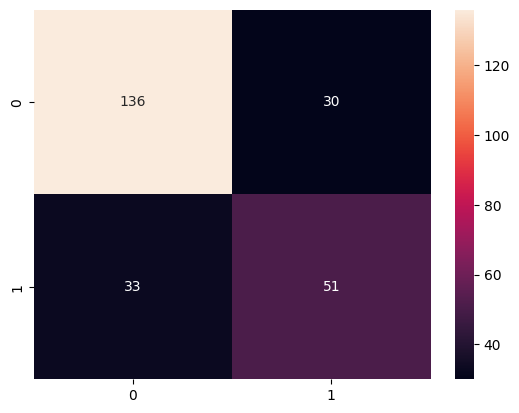

In [117]:
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()
naivebayes.fit(xtrain, ytrain)

ypred3=naivebayes.predict(xtest)

confusionm3 = confusion_matrix(ytest, ypred3)
sns.heatmap(confusionm3, annot = True, fmt="d")
print(naivebayes.score(xtest, ytest))
print(classification_report(ytest, ypred3))

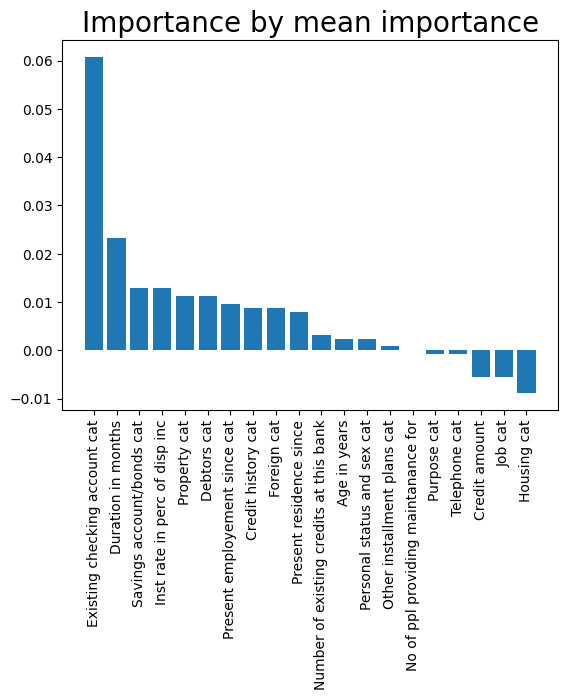

In [119]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(naivebayes, xtest, ytest)
importances = pd.DataFrame(data={
    'Attribute': xtrain.columns,
    'Importance': list(imps.importances_mean)
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Importance by mean importance', size=20)
plt.xticks(rotation='vertical')
plt.show()


The above thing is boggling my mind, because I am getting weird different results each time I run this cell lol. They are not that different but the graph looks different. It might have something to do with the permutation_importance() function, I think. 

The results are as follows:
 - This model is marginally worse than the other two, when looking at the results of classification report we notice that between the other two have a much higher chance of guessing that someone is actually eligible for a credit, but this one has a better idea of discerning when someone is ineligible for a credit. Even though the general accuracy of the model is a bit lower than the other two, I think the improvement in distinguishing that someone should not get the credit is also quite useful!
 - This model's most important feature is existing checking account, by far, followed by duration, savings account/bonds, installement rate and property


# 5. Fit a Classification Tree model. 

0.688
              precision    recall  f1-score   support

           1       0.74      0.81      0.78       166
           2       0.54      0.44      0.49        84

    accuracy                           0.69       250
   macro avg       0.64      0.63      0.63       250
weighted avg       0.68      0.69      0.68       250



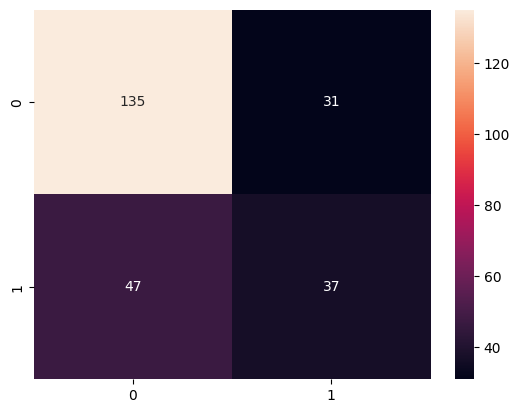

In [134]:
from sklearn import tree 

treemodel = tree.DecisionTreeClassifier()
treemodel.fit(xtrain, ytrain)

ypred4=treemodel.predict(xtest)

confusionm4 = confusion_matrix(ytest, ypred4)
sns.heatmap(confusionm4, annot = True, fmt="d")
print(treemodel.score(xtest, ytest))
print(classification_report(ytest, ypred4))

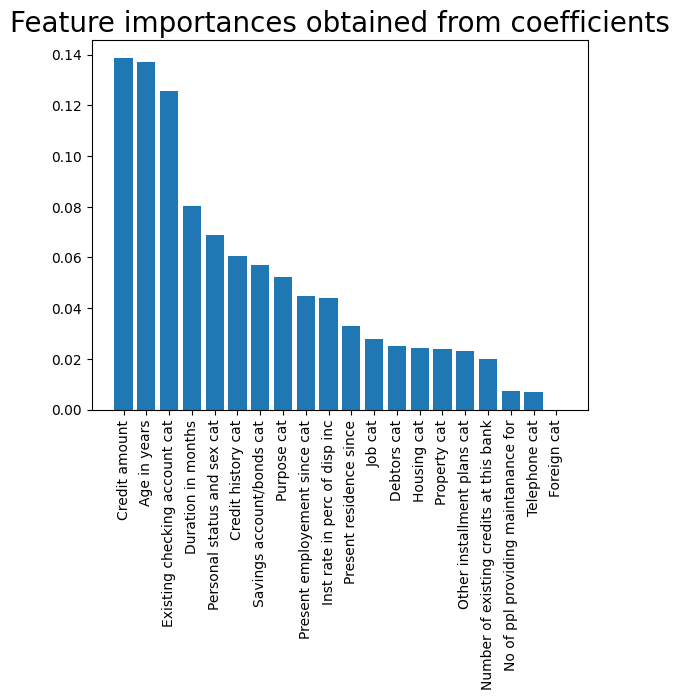

In [137]:

importances = pd.DataFrame(data={
    'Attribute': xtrain.columns,
    'Importance': treemodel.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()



And once again I will summarise the results in a few short sentences:
- This model is the worst by now, it is even less effective than just saying that everyone should be eligible for a credit (since base chance is 70%, and if we say that everyone is eligible we will beat what this model proposes)
- In every aspect of the classification report it is worse than the previous three.
- The most important features are as follows: credit amount, age, existing checking account, duration and personal status and sex.

# 6. Fit a Random Forest model.

0.76
              precision    recall  f1-score   support

           1       0.76      0.94      0.84       166
           2       0.77      0.40      0.53        84

    accuracy                           0.76       250
   macro avg       0.77      0.67      0.68       250
weighted avg       0.76      0.76      0.74       250



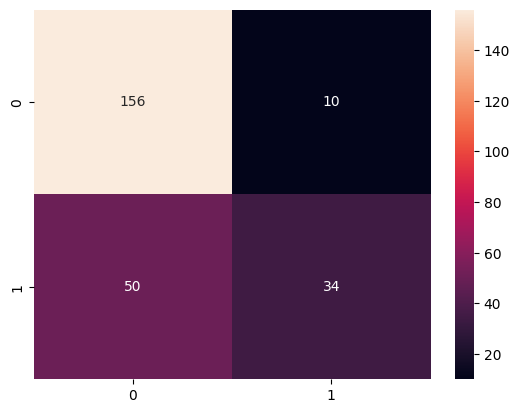

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(xtrain, ytrain)

ypred5=rf.predict(xtest)

confusionm5 = confusion_matrix(ytest, ypred5)
sns.heatmap(confusionm5, annot = True, fmt="d")
print(rf.score(xtest, ytest))
print(classification_report(ytest, ypred5))

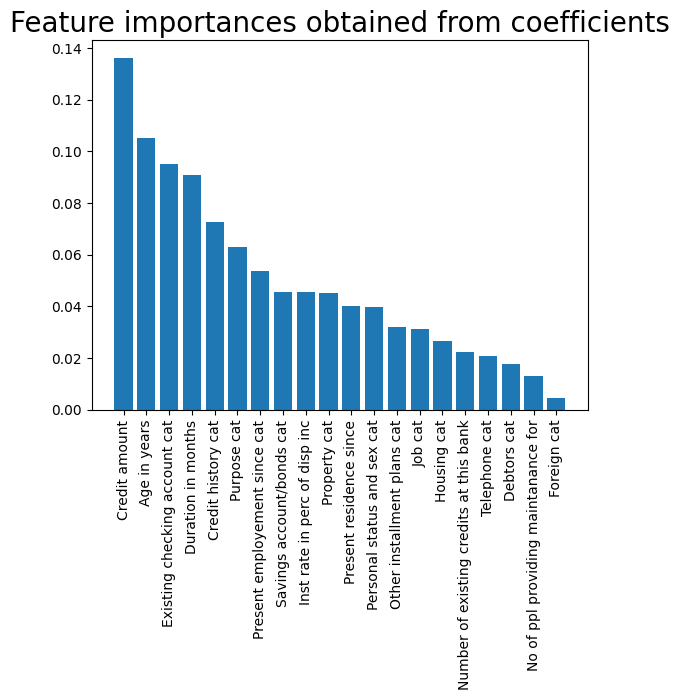

In [157]:
importances = pd.DataFrame(data={
    'Attribute': xtrain.columns,
    'Importance': rf.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

From the previous data and graphs we can get a couple of conclusions:
 - This is definitely better than the Classification Tree model, but against the other ones it's about the same, marginally worse even
 - The most important features driving this model are credit amount, age, existing checking account, duration in months and credit history

# 7. Fit a Support Vector Machine model. 

0.712
              precision    recall  f1-score   support

           1       0.72      0.92      0.81       166
           2       0.66      0.30      0.41        84

    accuracy                           0.71       250
   macro avg       0.69      0.61      0.61       250
weighted avg       0.70      0.71      0.68       250



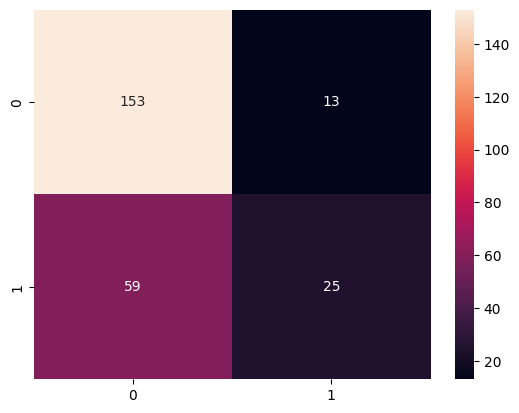

In [172]:
from sklearn import svm
clf = svm.SVC(kernel='linear', gamma='auto')

clf.fit(xtrain, ytrain)
ypred6 = clf.predict(xtest)

confusionm6 = confusion_matrix(ytest, ypred6)
sns.heatmap(confusionm6, annot = True, fmt="d")
print(clf.score(xtest, ytest))
print(classification_report(ytest, ypred6))
# A little note, this one definitely took the longest to finish with training (2 minutes and 41 seconds), 
# which could be because of my computer but I don't think so, 
# maybe the others are more efficient (they required about 0.5s to complete)

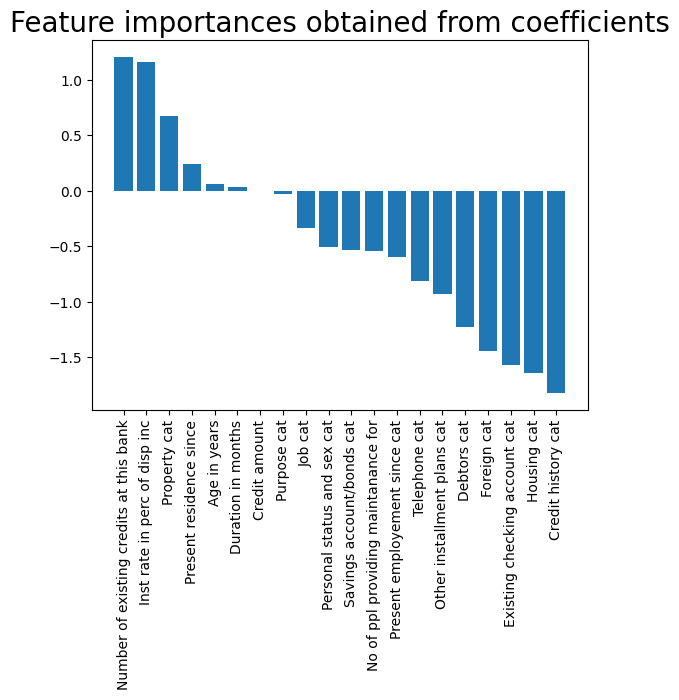

In [174]:
importances = pd.DataFrame(data={
    'Attribute': xtrain.columns,
    'Importance': clf.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

There are a couple of conclusions to be made here:
 - Credit history, housing, existing checking account, foreign and other installment plans are the factors driving this model
 - This model is good at deciding who is a good candidate for a credit, but not so much with deciding who not to give a credit to.

# 8. Fit a Neural Network model

0.712
              precision    recall  f1-score   support

           1       0.76      0.78      0.77       166
           2       0.55      0.52      0.54        84

    accuracy                           0.70       250
   macro avg       0.66      0.65      0.66       250
weighted avg       0.69      0.70      0.69       250



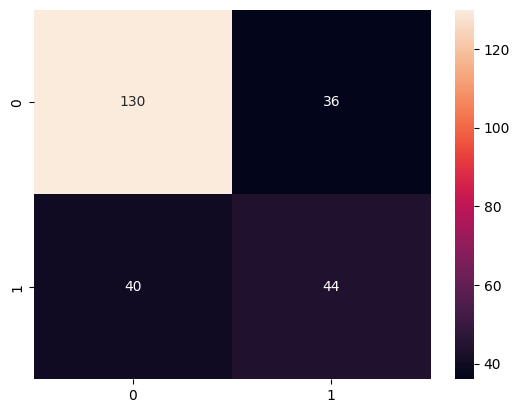

In [202]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(7,7,7), max_iter=5000, solver='adam')
mlp.fit(xtrain,ytrain)

ypred7 = mlp.predict(xtest)

confusionm7 = confusion_matrix(ytest, ypred7)
sns.heatmap(confusionm7, annot = True, fmt="d")
print(mlp.score(xtest, ytest))
print(classification_report(ytest, ypred7))


This does not seem good.. It is barely better than 70% chance... However this one is ok (not good but not as bad as some) at seeing which candidate shouldn't get the credit.
Also, with a bit of googling I have come upon that I can not list the top 5 most important variables in this case :)

# 9. Select the best performer based on the classification accuracy metrics. Argue around this choice. Do metrics converge or diverge?

                   modeli  rezultati
0                 Log reg      0.768
1                Lin disc      0.772
2             Naive Bayes      0.748
3     Classification tree      0.688
4           Random forest      0.760
5  Support vector machine      0.712
6          Neural network      0.696


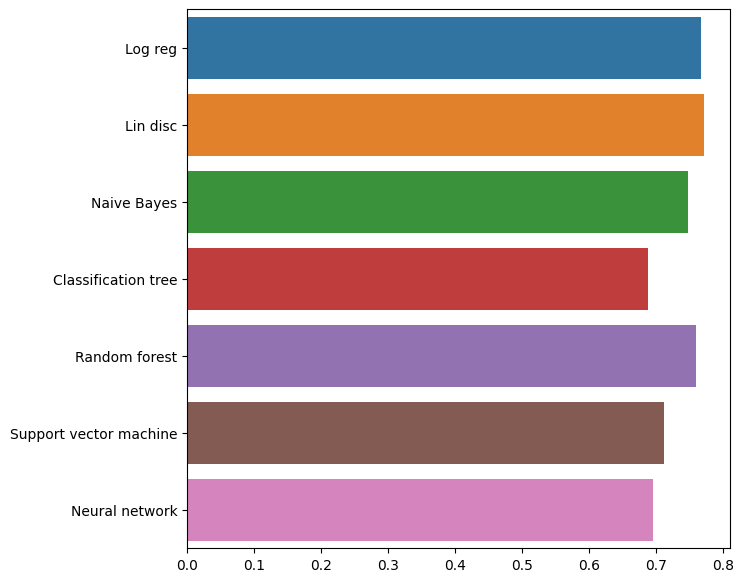

In [230]:
modeli = ['Log reg', 'Lin disc', 'Naive Bayes', 'Classification tree', 'Random forest', 'Support vector machine', 'Neural network']
rezultati = []
rezultati.append(logreg.score(xtest, ytest))
rezultati.append(lindiscmodel.score(xtest, ytest))
rezultati.append(naivebayes.score(xtest, ytest))
rezultati.append(treemodel.score(xtest, ytest))
rezultati.append(rf.score(xtest, ytest))
rezultati.append(clf.score(xtest, ytest))
rezultati.append(mlp.score(xtest, ytest))

df = pd.DataFrame()
df['modeli'] = modeli
df['rezultati'] = rezultati
print(df)
fig, ax = plt.subplots(figsize=(7, 7))
ax = sns.barplot(x=rezultati, y=modeli)
plt.show()



And with this we can definitely see that, for the most part, these are not very good at predicting. But what they are good at is helping me learn some new things! Hehe not everything has to succeed in the most formal way for it to be useful to us. This was really fun by the way, I got to use my knowledge of statistics and to remind myself of some math and so on. Building graphs that visualize real data is also quite entertaining. 

In the end, Linear discriminant analysis edges out the competition by just a little bit, and is followed quickly by logistic regression and random forest. 
Also the metrics should converge on a large sample, and diverge on a smaller one, but I do not have a definite proof of that :D